In [21]:
library(car)
library(ggplot2)
library(psych)


Attaching package: 'psych'

The following object is masked from 'package:boot':

    logit

The following objects are masked from 'package:ggplot2':

    %+%, alpha

The following object is masked from 'package:car':

    logit



### Test the assumption of Normality

* When the data is large, use the histogram is better than the statistics as the standard error will be fairly small in the large samples so that it is very easy to reject the null;
* If the data is small, use the statistics tool to look at the z score of these indicators to see whether it is statistically significant or not


* To check that the distribution of scores is approximately normal, we need to look at the values of skew and kurtosis in the output.
* Positive values of skew indicate too many low scores in the distribution, whereas negative values indicate a build-up of high scores.
* Positive values of kurtosis indicate a pointy and heavy-tailed distribution, whereas negative values indicate a flat and light-tailed distribution.
* The further the value is from zero, the more likely it is that the data are not normally distributed.
* You can test the significance of these values of skew and kurtosis, but these tests should not be used in large samples (because they are likely to be significant even when skew and kurtosis are not too different from normal).

In [ ]:
<h3><font color = "red">

In [4]:
dlf <- read.delim("E:/Personal/InterviewQuestion/Rscripts/LearningStatistics/DownloadFestival(No Outlier).dat", header=TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


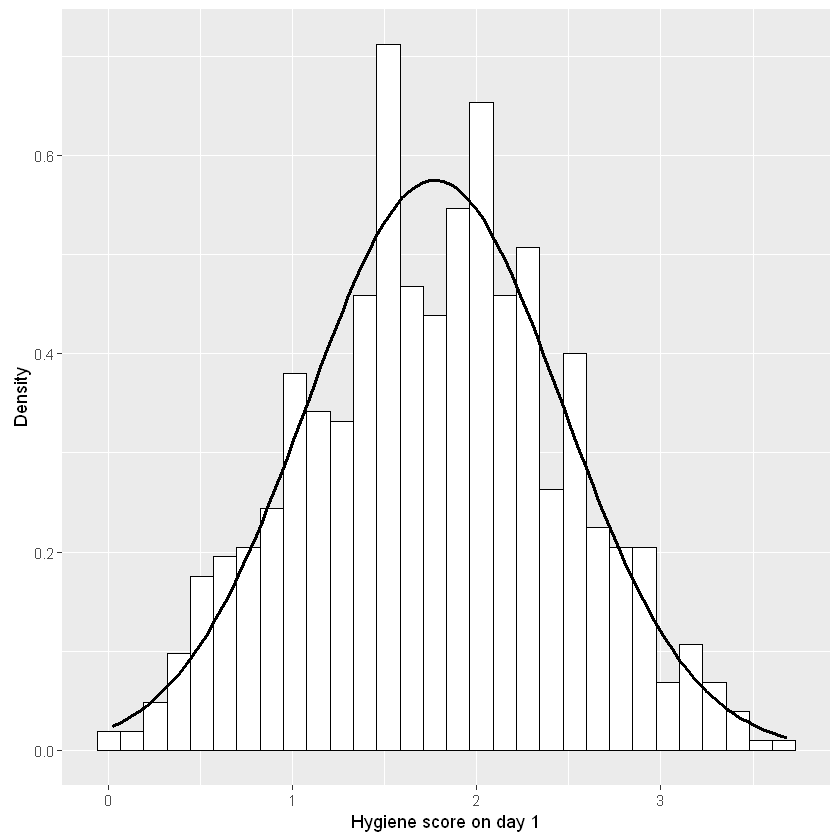

In [8]:
hist.day1 <- ggplot(dlf, aes(day1)) +theme(legend.position = "none") +
geom_histogram(aes(y = ..density..), colour = "black", fill = "white") +
labs(x = "Hygiene score on day 1", y = "Density") +stat_function(fun = dnorm, args = list(mean = mean(dlf$day1, na.rm
= TRUE), sd = sd(dlf$day1, na.rm = TRUE)), colour = "black", size = 1)
hist.day1

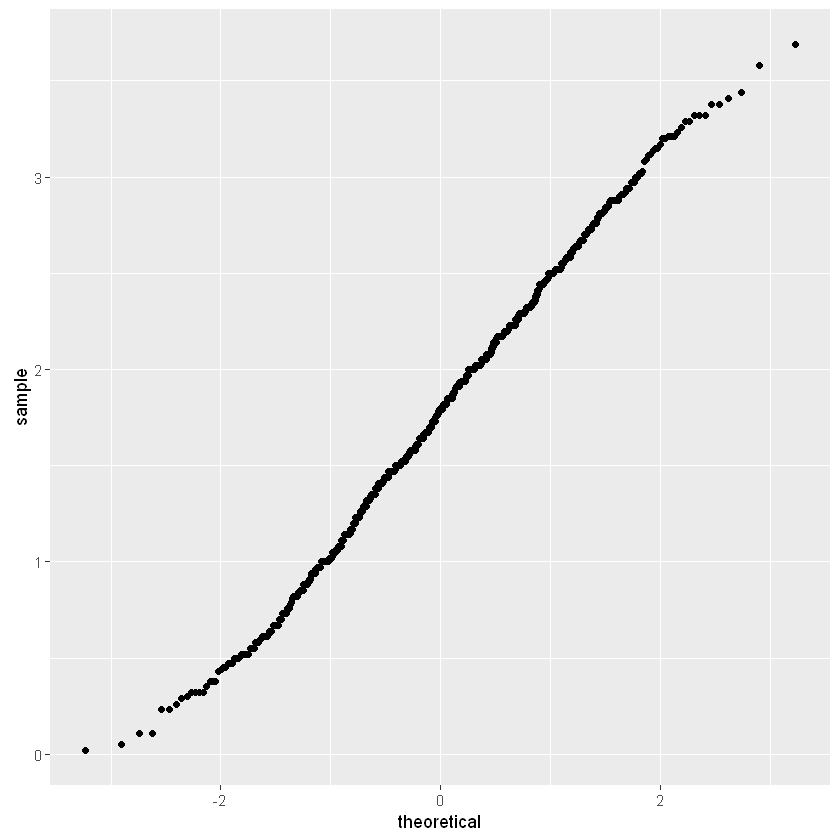

In [11]:
ggplot(dlf, aes(sample = day1)) + stat_qq()

* the data are ranked and sorted. Each value is compared to the expected value that the score should have in a normal distribution and they are plotted against one another

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 546 rows containing non-finite values (stat_bin).

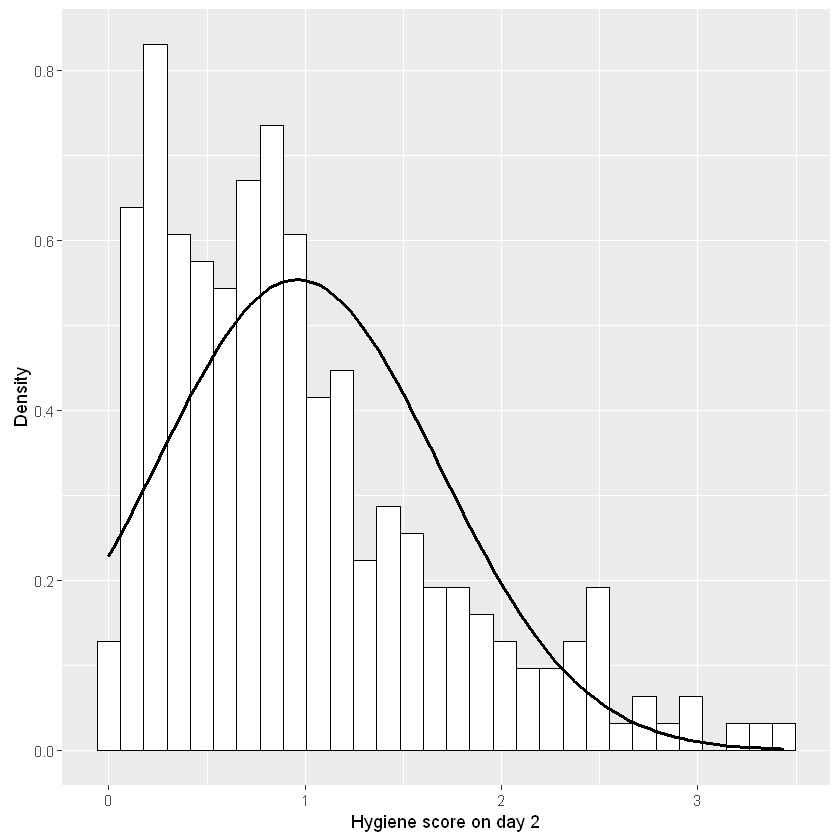

In [12]:
hist.day1 <- ggplot(dlf, aes(day2)) +theme(legend.position = "none") +
geom_histogram(aes(y = ..density..), colour = "black", fill = "white") +
labs(x = "Hygiene score on day 2", y = "Density") +stat_function(fun = dnorm, args = list(mean = mean(dlf$day2, na.rm
= TRUE), sd = sd(dlf$day2, na.rm = TRUE)), colour = "black", size = 1)
hist.day1

In [13]:
library(pastecs)

Loading required package: boot

Attaching package: 'boot'

The following object is masked from 'package:car':

    logit



In [16]:
round(stat.desc(dlf$day1, basic = FALSE, norm = TRUE), digits = 3)

median         mean      SE.mean CI.mean.0.95          var      std.dev 
       1.790        1.771        0.024        0.048        0.481        0.694 
    coef.var     skewness     skew.2SE     kurtosis     kurt.2SE   normtest.W 
       0.392       -0.004       -0.026       -0.422       -1.228        0.996 
  normtest.p 
       0.032

In [15]:
stat.desc(dlf[, c("day1", "day2", "day3")], basic = FALSE, norm = TRUE) 
# skew.2SE and kurt.2SE: it is just z score divided by 2 if it is larger than 1, which means it is statistically significant

,day1,day2,day3
median,1.79,0.79,0.76
mean,1.77113580246914,0.960909090909091,0.97650406504065
SE.mean,0.024368473768179,0.044360945714647,0.0640435202618981
CI.mean.0.95,0.047832893048912,0.0873478099781075,0.126780544928309
var,0.480996236170245,0.519523885240235,0.504493415966947
std.dev,0.693538921885604,0.720780053303527,0.710276999463552
coef.var,0.391578624811685,0.750102231441703,0.727367171209865
skewness,-0.00442835033184661,1.08281120843097,1.00781273491277
skew.2SE,-0.0257739487305684,3.61157382983099,2.30903518252697
kurtosis,-0.421594051797223,0.755461527664516,0.594545416475259


In [17]:
rexam <- read.delim("E:/Personal/InterviewQuestion/Rscripts/LearningStatistics/rexam.dat", header=TRUE)

In [18]:
rexam$uni<-factor(rexam$uni, levels = c(0:1), labels = c("Duncetown
University", "Sussex University"))

In [20]:
by(data = rexam$exam, INDICES = rexam$uni, FUN = stat.desc)

rexam$uni: Duncetown
University
     nbr.val     nbr.null       nbr.na          min          max        range 
  50.0000000    0.0000000    0.0000000   15.0000000   66.0000000   51.0000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
2009.0000000   38.0000000   40.1800000    1.7803210    3.5776890  158.4771429 
     std.dev     coef.var 
  12.5887705    0.3133094 
------------------------------------------------------------ 
rexam$uni: Sussex University
     nbr.val     nbr.null       nbr.na          min          max        range 
  50.0000000    0.0000000    0.0000000   56.0000000   99.0000000   43.0000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
3801.0000000   75.0000000   76.0200000    1.4432079    2.9002348  104.1424490 
     std.dev     coef.var 
  10.2050208    0.1342413 

In [22]:
by(data = rexam$exam, INDICES = rexam$uni, FUN = describe)

rexam$uni: Duncetown
University
  vars  n  mean    sd median trimmed  mad min max range skew kurtosis   se
1    1 50 40.18 12.59     38   39.85 12.6  15  66    51 0.29    -0.72 1.78
------------------------------------------------------------ 
rexam$uni: Sussex University
  vars  n  mean    sd median trimmed mad min max range skew kurtosis   se
1    1 50 76.02 10.21     75    75.7 8.9  56  99    43 0.26    -0.46 1.44

In [ ]:
# by(data = dataFrame, INDICES = grouping variable, FUN = a function that you want to apply to the data)

In [23]:
by(cbind(data=rexam$exam,data=rexam$numeracy), rexam$uni, describe)

INDICES: Duncetown
University
  vars  n  mean    sd median trimmed   mad min max range skew kurtosis   se
1    1 50 40.18 12.59     38   39.85 12.60  15  66    51 0.29    -0.72 1.78
2    2 50  4.12  2.07      4    4.00  2.22   1   9     8 0.48    -0.65 0.29
------------------------------------------------------------ 
INDICES: Sussex University
  vars  n  mean    sd median trimmed  mad min max range skew kurtosis   se
1    1 50 76.02 10.21     75   75.70 8.90  56  99    43 0.26    -0.46 1.44
2    2 50  5.58  3.07      5    5.28 2.97   1  14    13 0.75    -0.01 0.43

### Shapiro–Wilk

* compares the scores in the sample to a normally distributed set of scores with the same mean and sd
* limitations because with large sample sizes it is very easy to get significant results from small deviations from normality, and so a significant test doesn’t necessarily tell us whether the deviation from normality is enough to bias any statistical procedures that we apply to the data.

* The Shapiro–Wilk test can be used to see if a distribution of scores significantly differs from a normal
distribution. If the Shapiro–Wilk test is significant (p-value less than .05) then the scores are significantly different
from a normal distribution. Otherwise, scores are approximately normally distributed.
* Warning: In large samples this test can be significant even when the scores are only slightly different
from a normal distribution. Therefore, they should always be interpreted in conjunction with histograms,
or Q-Q plots, and the values of skew and kurtosis.

In [24]:
shapiro.test(rexam$exam)
shapiro.test(rexam$numeracy)


	Shapiro-Wilk normality test

data:  rexam$exam
W = 0.96131, p-value = 0.004991



	Shapiro-Wilk normality test

data:  rexam$numeracy
W = 0.92439, p-value = 2.424e-05


In [25]:
by(rexam$numeracy, rexam$uni, shapiro.test)

rexam$uni: Duncetown
University

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.94082, p-value = 0.01452

------------------------------------------------------------ 
rexam$uni: Sussex University

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.93235, p-value = 0.006787


In [ ]:
The percentage on the R exam, W = 0.96, p = .005, and the numeracy scores, W = 0.92, p = .001, were both significantly non-normal.

### Test the assumption of homogeneity of variance

* If you’ve
collected groups of data then this means that the variance of your outcome variable or variables
should be the same in each of these groups. If you’ve collected continuous data (such as in
correlational designs), this assumption means that the variance of one variable should be stable at
all levels of the other variable.

* It’s a very simple and elegant test that works by doing a
one-way ANOVA (see Chapter 10) conducted on the deviation scores; that is, the absolute
difference between each score and the mean of the group from which it came

* Warning: In large samples Levene’s test can be significant even when group variances are not very
different. Therefore, it should be interpreted in conjunction with the variance ratio.

* Variance ratio is the ratio of the variances between the group with the biggest variance and the group with the smallest

In [27]:
leveneTest(rexam$exam, rexam$uni, center = mean) # or median to see how to calculate the variance

,Df,F value,Pr(>F)
group,1,2.58411042336229,0.111158262690507
,98,NA,NA


In [28]:
leveneTest(rexam$numeracy, rexam$uni)

,Df,F value,Pr(>F)
group,1,5.36604507163942,0.0226152510343671
,98,NA,NA


### If the normality assumption is violated

* Use Non-parametric method
* Use robust test: The test result will still be accurate even if the assumptions are violated. For example, Anova test. Or trimmed mean: A trimmed mean is simply a mean based on the distribution of
scores after some percentage of scores has been removed from each extreme of the distribution.
So, a 10% trimmed mean will remove 10% of scores from the top and bottom before the mean is
calculated.

Bootstrap: The standard error of the statistic is
estimated from the standard deviation of this sampling distribution created from the bootstrap
samples. From this standard error, confidence intervals and significance tests can be computed